In [10]:
import numpy as np
import matplotlib.pyplot as plt

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10
nonlinearities = ['tanh'] * len(hidden_layer_sizes)

In [11]:
act = {'relu': lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01
    
    H = np.dot(X, W)
    print(H.shape)
    H = act[nonlinearities[i]](H)
    Hs[i] = H

(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)
(1000, 500)


input layer had mean 0.002678 and std 0.999675
hidden layer 1 had mean -0.000145 and std 0.213077
hidden layer 2 had mean -0.000036 and std 0.047578
hidden layer 3 had mean 0.000011 and std 0.010633
hidden layer 4 had mean -0.000003 and std 0.002389
hidden layer 5 had mean 0.000000 and std 0.000535
hidden layer 6 had mean -0.000000 and std 0.000120
hidden layer 7 had mean -0.000000 and std 0.000027
hidden layer 8 had mean -0.000000 and std 0.000006
hidden layer 9 had mean 0.000000 and std 0.000001
hidden layer 10 had mean -0.000000 and std 0.000000


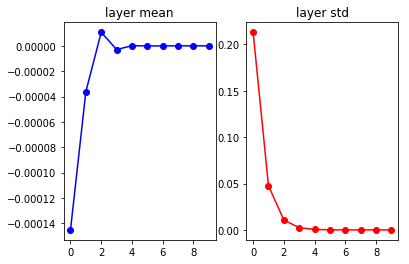

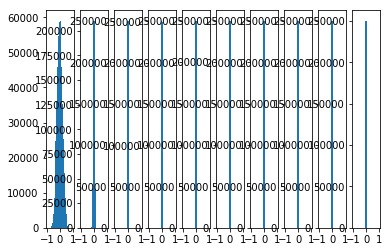

In [12]:
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))


In [13]:
print(Hs.items())
print(nonlinearities);
for c in range(len(hidden_layer_sizes)):
    print(c)
print(W.shape, '\n', W)
print(D,'\n', D.shape);
print(hidden_layer_sizes)

dict_items([(0, array([[-0.28661376,  0.3451559 , -0.23729127, ..., -0.11882763,
        -0.05538649, -0.02408604],
       [ 0.05375747,  0.01428056, -0.24553039, ...,  0.10947666,
         0.23414694, -0.18212166],
       [ 0.25526515, -0.01502189,  0.08694423, ..., -0.48081159,
        -0.14553939,  0.0943733 ],
       ...,
       [-0.08950244,  0.17928611, -0.35517554, ..., -0.16612572,
         0.11530863,  0.17079701],
       [-0.08706304, -0.36709775,  0.1526456 , ..., -0.0408615 ,
         0.26511568, -0.0139596 ],
       [ 0.20513258,  0.07690703,  0.06969099, ..., -0.37086438,
         0.1318302 , -0.02805973]])), (1, array([[-0.07337828, -0.05257748, -0.01582667, ..., -0.0045304 ,
        -0.00295561,  0.0419479 ],
       [-0.02180218, -0.03217113,  0.04145326, ..., -0.09504408,
         0.01942864,  0.02519414],
       [ 0.06961688,  0.00497458,  0.00970192, ..., -0.01919944,
        -0.06882246,  0.0162755 ],
       ...,
       [ 0.04241795,  0.01964286, -0.09782388, ..., -

In [14]:
p = 0.5
B = D
D = np.random.rand(*D.shape) < p
print(*D.shape)
print(D)

B *= D
print(*B.shape)
print(B)

1000 500
[[False  True  True ...  True  True False]
 [False  True  True ... False  True False]
 [False  True False ... False False False]
 ...
 [ True  True False ... False  True  True]
 [ True False  True ...  True  True  True]
 [False False  True ...  True False  True]]
1000 500
[[-0.          0.14607055 -0.15238374 ... -1.08155167  0.31447761
   0.        ]
 [ 0.         -0.84208227  0.60203605 ...  0.          1.9077445
   0.        ]
 [ 0.         -0.98686558 -0.         ...  0.          0.
   0.        ]
 ...
 [ 1.5744428  -0.75364008  0.         ...  0.          0.01955648
  -0.04481961]
 [-2.05975171  0.         -0.04113373 ...  0.41999341 -0.72484211
  -0.77440621]
 [-0.          0.         -1.0954416  ...  2.40337144  0.
   1.51337528]]


In [1]:
import tensorflow as tf